In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
run = 5
number = 1

In [3]:
#folder = "../../../" + sut + "/appBenchmark/results/run" + str(run) + "/" + str(number) + "/"
#folder = "../../../../../results/run" + str(run) + "/" + str(number) + "/"
folder = "../../resultsVm/run" + str(run) + "/" + str(number) + "/"
print(folder)

../../resultsVm/run5/1/


In [4]:
all_files = glob.glob(folder + "*")
print("Files in folder:")
for filename in all_files:
    print(filename)

Files in folder:
../../resultsVm/run5/1\getResults.log
../../resultsVm/run5/1\info.log
../../resultsVm/run5/1\latenciesInsertsNew.csv
../../resultsVm/run5/1\latenciesInsertsOld.csv
../../resultsVm/run5/1\latenciesQueries1New.csv
../../resultsVm/run5/1\latenciesQueries1Old.csv
../../resultsVm/run5/1\latenciesQueries2New.csv
../../resultsVm/run5/1\latenciesQueries2Old.csv
../../resultsVm/run5/1\logInsertsNew.log
../../resultsVm/run5/1\logInsertsOld.log
../../resultsVm/run5/1\logQueries1New.log
../../resultsVm/run5/1\logQueries1Old.log
../../resultsVm/run5/1\logQueries2New.log
../../resultsVm/run5/1\logQueries2Old.log
../../resultsVm/run5/1\new_version_container.log
../../resultsVm/run5/1\old_version_container.log
../../resultsVm/run5/1\runBenchmark.log
../../resultsVm/run5/1\start_tsbs-r5n1.log
../../resultsVm/run5/1\start_vm-r5n1.log
../../resultsVm/run5/1\teardown.log


In [5]:
insertsOld = pd.read_csv(folder + "latenciesInsertsOld.csv",
                         header=None,
                         names=["batch","latency (ms)"],
                         sep=" ")

insertsNew = pd.read_csv(folder + "latenciesInsertsNew.csv",
                         header=None,
                         names=["batch","latency (ms)"],
                         sep=" ")

queries1Old = pd.read_csv(folder + "latenciesQueries1Old.csv",
                         header=None,
                         names=["query","latency (ms)"],
                         sep=" ")

queries1New = pd.read_csv(folder + "latenciesQueries1New.csv",
                         header=None,
                         names=["query","latency (ms)"],
                         sep=" ")

queries2Old = pd.read_csv(folder + "latenciesQueries2Old.csv",
                         header=None,
                         names=["query","latency (ms)"],
                         sep=" ")

queries2New = pd.read_csv(folder + "latenciesQueries2New.csv",
                         header=None,
                         names=["query","latency (ms)"],
                         sep=" ")

queries1Old.drop(queries1Old[queries1Old["query"] > 1100].index, inplace=True)
queries1New.drop(queries1New[queries1New["query"] > 1100].index, inplace=True)
queries2Old.drop(queries2Old[queries2Old["query"] > 1100].index, inplace=True)
queries2New.drop(queries2New[queries2New["query"] > 1100].index, inplace=True)

print("Done.")

Done.


In [6]:
insertsOld.describe()

,batch,latency (ms)
count,259200.000000,259200.000000
mean,129600.500000,3.681871
std,74824.739224,8.558116
min,1.000000,0.924617
25%,64800.750000,1.585670
50%,129600.500000,1.932886
75%,194400.250000,2.972078
max,259200.000000,1008.817761


In [7]:
insertsNew.describe()

,batch,latency (ms)
count,259200.000000,259200.000000
mean,129600.500000,3.512896
std,74824.739224,24.301240
min,1.000000,0.897451
25%,64800.750000,1.538959
50%,129600.500000,1.835301
75%,194400.250000,2.684033
max,259200.000000,3966.218595


<AxesSubplot:xlabel='batch', ylabel='latency (ms)'>

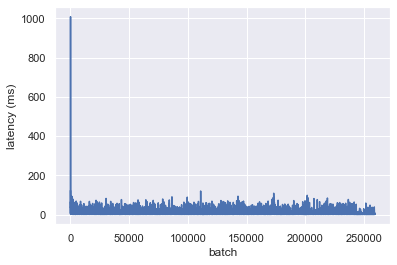

In [8]:
sns.lineplot(x="batch", y="latency (ms)", data=insertsOld)

<AxesSubplot:xlabel='batch', ylabel='latency (ms)'>

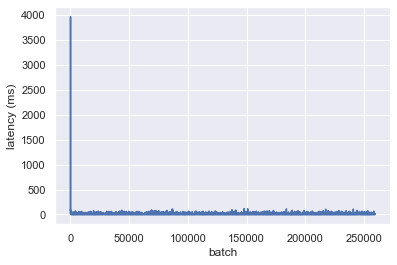

In [9]:
sns.lineplot(x="batch", y="latency (ms)", data=insertsNew)

In [10]:
rows = []
for lat in insertsOld["latency (ms)"]:
    rows.append({
        "type" : "old",
        "latency" : lat
    })
for lat in insertsNew["latency (ms)"]:
    rows.append({
        "type" : "new",
        "latency" : lat
    })

df_result = pd.DataFrame(rows)
df_result.describe()

,latency
count,518400.000000
mean,3.597383
std,18.218186
min,0.897451
25%,1.560872
50%,1.882075
75%,2.823748
max,3966.218595


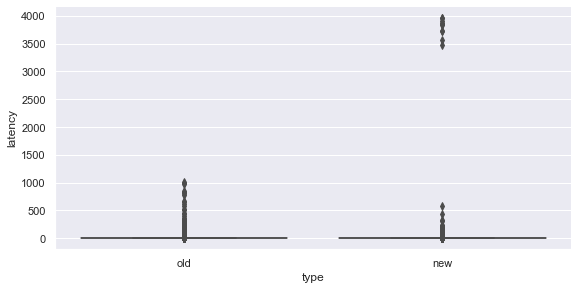

In [11]:
sns.catplot(x="type", y="latency", kind="box", data=df_result, height=4, aspect=2)

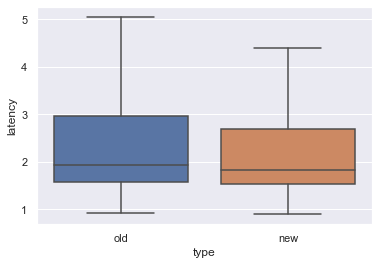

In [12]:
sns.boxplot(x="type", y="latency", showfliers=False, data=df_result);

In [13]:
df_inserts = pd.DataFrame()
df_inserts["old"] = insertsOld["latency (ms)"]
df_inserts["new"] = insertsNew["latency (ms)"]
df_inserts.describe()

,old,new
count,259200.000000,259200.000000
mean,3.681871,3.512896
std,8.558116,24.301240
min,0.924617,0.897451
25%,1.585670,1.538959
50%,1.932886,1.835301
75%,2.972078,2.684033
max,1008.817761,3966.218595


<AxesSubplot:xlabel='query', ylabel='latency (ms)'>

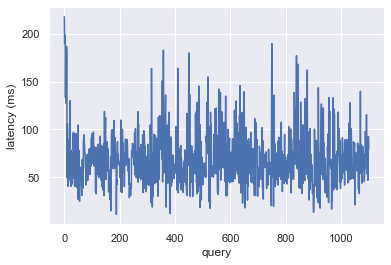

In [14]:
sns.lineplot(x="query", y="latency (ms)", data=queries1Old)

<AxesSubplot:xlabel='query', ylabel='latency (ms)'>

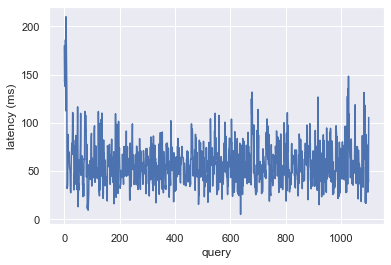

In [15]:
sns.lineplot(x="query", y="latency (ms)", data=queries1New)

<AxesSubplot:xlabel='query', ylabel='latency (ms)'>

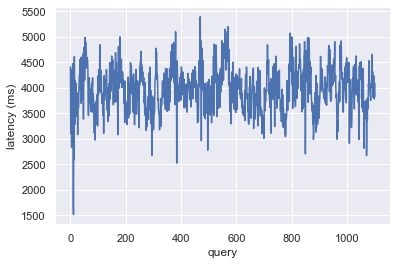

In [16]:
sns.lineplot(x="query", y="latency (ms)", data=queries2Old)

<AxesSubplot:xlabel='query', ylabel='latency (ms)'>

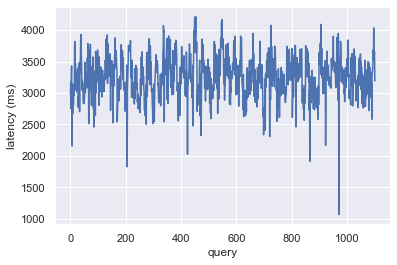

In [17]:
sns.lineplot(x="query", y="latency (ms)", data=queries2New)

In [18]:
df_queries = pd.DataFrame()
df_queries["old1"] = queries1Old["latency (ms)"]
df_queries["new1"] = queries1New["latency (ms)"]
df_queries["old2"] = queries2Old["latency (ms)"]
df_queries["new2"] = queries2New["latency (ms)"]
df_queries.describe()

,old1,new1,old2,new2
count,1101.000000,1098.000000,1099.000000,1099.000000
mean,69.791046,57.496427,3976.476829,3250.303979
std,27.622752,23.012247,440.669021,332.943129
min,11.113242,5.023291,1515.476682,1070.092431
25%,51.452758,42.849609,3701.393620,3052.268574
50%,65.919090,55.054979,3996.361943,3255.744493
75%,81.904820,69.100932,4270.310023,3473.086640
max,217.789491,209.943876,5390.764685,4211.537763
